<div class="output_png output_subarea output_execute_result">
<center>
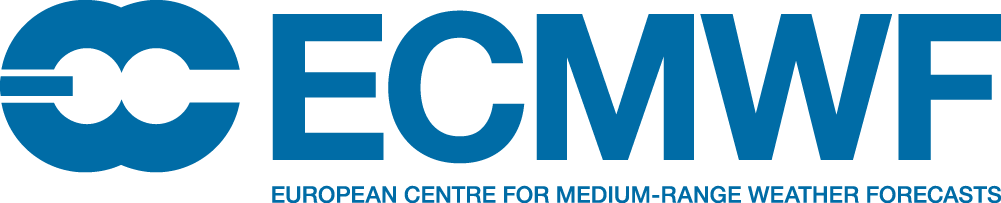</center>
</div>

# 	Ensemble mean for total accumulated precipitation

This notebook will provide you guidance how to explore and plot ECMWF open dataset to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://apps.ecmwf.int/webapps/opencharts/products/medium-tp-acc-mean


The full list of available Open data products can be found [here](https://www.ecmwf.int/en/forecasts/datasets/open-data), and more information can be found in the [User documentation](https://confluence.ecmwf.int/display/UDOC/ECMWF+Open+Data+-+Real+Time).  

Access to ECMWF Open data is governed by the Creative Commons CC-BY-4.0 licence and associated [Terms of Use](https://apps.ecmwf.int/datasets/licences/general/).  

<sub> In applying this licence, ECMWF does not waive the privileges and immunities granted to it by virtue of its status as an intergovernmental organisation nor does it submit to any jurisdiction </sub>

To find out how to obtain the access to the full forecast dataset at higher resolution please visit our [Access page](https://www.ecmwf.int/en/forecasts/accessing-forecasts).

## Retrieve Data
This product takes in input parameter:

* [Total precipitation](https://apps.ecmwf.int/codes/grib/param-db/?id=228)

In this example, we will use: 
- **ecmwf.opendata** Client to download the data
- **ecmwf.data** library to read and process the data (calculate the speed and probabilities)
- **ecmwf.geomaps** to plot the result

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> If you are running the notebook on MyBinder or already have the libraries installed, go directly to importing the libraries.
</div>
<div class="alert alert-block alert-info">
<b>Note:</b> If you don't have these libraries installed, click on three dots below, uncomment the code and run the next cell.
</div>

In [1]:
#import sys
#!{sys.executable} -m pip install ecmwf-data ecmwf-opendata git+https://github.com/ecmwf/ecmwf-geomaps.git

In [2]:
import ecmwf.data as ecdata
from ecmwf.geomaps import GeoMap
from ecmwf.opendata import Client

In [3]:
client = Client("ecmwf", beta=True)

In [4]:
parameters = ['tp']
filename = 'medium-tp-acc-mean.grib'
filename

'medium-tp-acc-mean.grib'

To calculate the mean of total accumulated precipitation, we need to retrieve all the ensemble members at the given time.  
Setting the **type** to **ef** will download all 50 ensemble members as well as the control forecast.

In [5]:
client.retrieve(
    date=-2,
    time=0,
    step=240,
    stream="enfo",
    type="ef",
    levtype="sfc",
    param=parameters,
    target=filename
)

{'date': '-2', 'time': '0', 'step': '240', 'stream': 'enfo', 'type': 'ef', 'resol': '0p4-beta', '_url': 'https://ai4edataeuwest.blob.core.windows.net/ecmwf', 'extension': 'grib2'}
{'levtype': ['sfc'], 'param': ['tp'], 'step': ['240'], 'type': ['cf', 'pf']}


In [6]:
data = ecdata.read(filename)

The **describe()** function will give us the overview of the dataset.  

In [7]:
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
tp,surface,0,20220116,0,240,"0,1,...",228228,od,enfo,"cf,pf",0001


We can use **ls()** function to list all the fields in the file we downloaded.

In [8]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,tp,surface,0,20220116,0,240,pf,27,regular_ll
1,ecmf,tp,surface,0,20220116,0,240,pf,41,regular_ll
2,ecmf,tp,surface,0,20220116,0,240,pf,47,regular_ll
3,ecmf,tp,surface,0,20220116,0,240,pf,21,regular_ll
4,ecmf,tp,surface,0,20220116,0,240,pf,4,regular_ll
5,ecmf,tp,surface,0,20220116,0,240,pf,50,regular_ll
6,ecmf,tp,surface,0,20220116,0,240,pf,49,regular_ll
7,ecmf,tp,surface,0,20220116,0,240,pf,38,regular_ll
8,ecmf,tp,surface,0,20220116,0,240,pf,16,regular_ll


We can simply calculate the mean of all the ensemble members:

In [9]:
mean_tp = ecdata.mean(data)

And finally, we can plot the data on the map. 

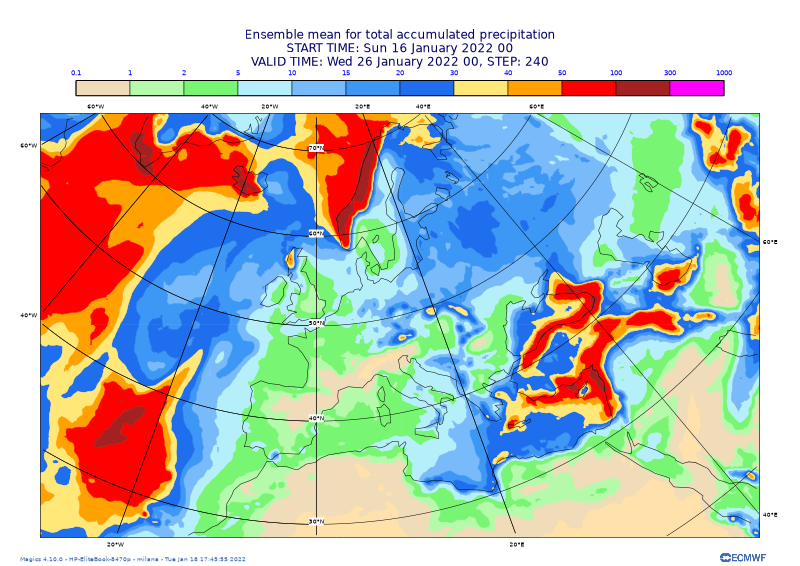

In [10]:
fig = GeoMap(area_name='europe', preset='background-foreground')

fig.contour_lines(mean_tp, preset="accumulated_tp_3")
fig.title(["Ensemble mean for total accumulated precipitation", 
          "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' />",
          "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' />, STEP: <grib_info key='step' />"])
fig.legend()

fig.show()